In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

## Linear Regression

### Hồi quy tuyến tính là gì?
Hồi quy tuyến tính (**Linear Regression**) là một phương pháp thống kê được sử dụng để mô hình hóa mối quan hệ giữa một hoặc nhiều biến đầu vào (**biến độc lập**, $X$) và một biến đầu ra (**biến phụ thuộc**, $y$).

Mục tiêu của hồi quy tuyến tính là tìm một **đường thẳng tốt nhất** (trong trường hợp đơn biến) hoặc một **siêu mặt phẳng** (trong trường hợp đa biến) để dự đoán giá trị của $y$ dựa trên $X$.

---

### Hồi quy tuyến tính làm gì?
Hồi quy tuyến tính:
- **Mô hình hóa mối quan hệ**: Biểu diễn mối quan hệ tuyến tính giữa các biến đầu vào và biến đầu ra.
- **Dự đoán**: Sử dụng mối quan hệ tuyến tính đã học được để dự đoán giá trị của $y$ cho dữ liệu mới.
- **Phân tích tác động**: Đo lường tác động của từng biến độc lập đến biến phụ thuộc dựa trên các hệ số hồi quy ($\theta$).

Ví dụ: Trong một bài toán kinh doanh, bạn có thể sử dụng hồi quy tuyến tính để dự đoán doanh số bán hàng ($y$) dựa trên chi tiêu quảng cáo ($X$).

---

### Hồi quy tuyến tính giải quyết loại vấn đề nào?
Hồi quy tuyến tính thường được sử dụng cho các **bài toán hồi quy**, nơi đầu ra cần dự đoán là một **biến liên tục**. Ví dụ:
- Dự đoán giá nhà ($y$) dựa trên diện tích, số phòng, v.v. ($X$).
- Dự đoán lượng mưa ($y$) dựa trên nhiệt độ, độ ẩm, v.v. ($X$).

---

### Hồi quy tuyến tính hoạt động như thế nào?

Hồi quy tuyến tính xây dựng một mô hình dự đoán giá trị $y$ dựa trên $X$ bằng phương trình đường thẳng:

$$
\hat{y} = \mathbf{aX + b} = \mathbf{X_b} \mathbf{\theta}
$$

Trong đó:
- $\hat{y}$: Giá trị dự đoán.
- $a$: Vector tham số slope - tham số góc của đường thẳng
- $X$: Ma trận đầu vào gốc
- $b$: Vector bias/intercept - tham số giao điểm của đường thẳng và trục x  

Ta có thể rút gọn công thức phương trình đường thẳng trên thành vế sau, lúc đó:
- $\mathbf{X_b}$: Ma trận đầu vào có thêm cột bias với giá trị 1 ở đầu ($\mathbf{X_b}$ = ${\mathbf{b} |\mathbf{X}}$).
- $\mathbf{\theta}$: Vector tham số (intercept và slope) ($\mathbf{\theta} = {\mathbf{\theta}_0, \mathbf{\theta}_1, ..., \mathbf{\theta}_n}$) và $\mathbf{\theta}_0$ là tham số cho bias.

#### Ví dụ (Hồi quy đơn biến):
Nếu $y$ phụ thuộc tuyến tính vào $x$, phương trình hồi quy có dạng:

$$
\hat{y} = \theta_0 + \theta_1 x
$$

Trong đó:
- $\theta_0$: Hệ số chặn (intercept).
- $\theta_1$: Độ dốc của đường thẳng (slope).

---

### Tối ưu hóa mô hình

Hồi quy tuyến tính tìm $\mathbf{\theta}$ sao cho **tổng bình phương sai số (Sum of Squared Errors - SSE)** giữa giá trị thực ($y$) và giá trị dự đoán ($\hat{y}$) là nhỏ nhất:

$$
J(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}_i - y_i \right)^2
$$

Hoặc viết dưới dạng vector:

$$
J(\mathbf{\theta}) = \frac{1}{m} \| X_b \mathbf{\theta} - \mathbf{y} \|^2
$$

#### Gradient Descent:
Hồi quy tuyến tính sử dụng thuật toán **gradient descent** để tìm $\mathbf{\theta}$ tối ưu:
1. Tính gradient:

$$
\nabla_\mathbf{\theta} J(\mathbf{\theta}) = \frac{2}{m} X_b^\top \left( X_b \mathbf{\theta} - \mathbf{y} \right)
$$

2. Cập nhật tham số:

$$
\mathbf{\theta} \gets \mathbf{\theta} - \text{learning\_rate} \cdot \nabla_\mathbf{\theta} J(\mathbf{\theta})
$$

#### Giải pháp tối ưu:
Một cách khác để tìm $\mathbf{\theta}$ là sử dụng **phương trình chuẩn (Normal Equation)**:

$$
\mathbf{\theta} = \left( X_b^\top X_b \right)^{-1} X_b^\top \mathbf{y}
$$

---

### Đặc điểm và Giới hạn

#### Đặc điểm:
- **Dễ triển khai**: Hồi quy tuyến tính đơn giản và hiệu quả với các bài toán quy mô nhỏ.
- **Diễn giải dễ dàng**: Hệ số $\mathbf{\theta}$ thể hiện tác động của mỗi biến $X$ lên $y$.

#### Giới hạn:
- **Giả định tuyến tính**: Chỉ hoạt động tốt nếu mối quan hệ giữa $X$ và $y$ là tuyến tính.
- **Nhạy cảm với ngoại lệ**: Các giá trị ngoại lệ (outliers) có thể ảnh hưởng lớn đến mô hình.
- **Không xử lý được quan hệ phi tuyến tính (non-linear)**: Khi dữ liệu có mối quan hệ phi tuyến tính, hồi quy tuyến tính không hiệu quả.

---

### Tổng kết

Hồi quy tuyến tính là một phương pháp mạnh mẽ và dễ hiểu cho các bài toán hồi quy liên tục. Nó hoạt động dựa trên nguyên lý tối ưu hóa tổng bình phương sai số bằng gradient descent hoặc phương trình chuẩn. Tuy nhiên, hiệu quả của nó phụ thuộc vào chất lượng dữ liệu và mối quan hệ giữa các biến.

In [2]:
# Linear Regression from Scratch
class LinearRegressionScratch:
    """
    Một mô hình Linear Regression được triển khai từ đầu.

    Thuộc tính:
        theta (numpy.ndarray): Trọng số của mô hình hồi quy (intercept + slope).

    Phương thức:
        fit(X, y):
            Huấn luyện mô hình với dữ liệu đầu vào X và nhãn mục tiêu y
            bằng cách tối ưu hóa least square error.
        predict(X):
            Dự đoán giá trị mục tiêu cho dữ liệu đầu vào mới X sử dụng mô hình đã học.
    """

    def __init__(self):
        self.theta = None

    def fit(self, X, y, learning_rate=0.1, epochs=1000, epsilon=1e-6):
        """
        Huấn luyện mô hình với dữ liệu đầu vào và tối ưu hóa sử dụng gradient descent.

        Args:
            X (numpy.ndarray): Ma trận đặc trưng đầu vào với kích thước (n_samples, n_features).
            y (numpy.ndarray): Giá trị mục tiêu với kích thước (n_samples, 1).
            learning_rate (float): Bước nhảy (step size) cho gradient descent.
            epochs (int): Số lượng vòng lặp để tối ưu hóa.
            epsilon (float): Ngưỡng để dừng sớm khi mất mát không còn cải thiện đáng kể
        Returns:
            None
        """
        # Thêm bias term (X0 = 1)
        # Tạo ma trận đặc trưng đầu vào X_b, với một cột toàn giá trị 1 ở đầu để đại diện cho bias (X0).
        # Điều này giúp biểu diễn phương trình hồi quy tuyến tính dưới dạng vector hóa:
        #    ŷ = X_b @ θ
        # Trong đó, θ[0] là hệ số của bias (intercept), và các θ[i] còn lại là hệ số của các đặc trưng (features).
        X_b = 
        m =   # Số lượng mẫu

        # Khởi tạo trọng số ngẫu nhiên
        # Khởi tạo vector θ (kích thước: số đặc trưng + 1) với các giá trị ngẫu nhiên ban đầu.
        # θ[0]: Hệ số của bias (intercept).
        # θ[1:], θ[2:], ..., θ[n]: Hệ số của các đặc trưng đầu vào.
        self.theta = 

        # Gradient Descent
        # Cập nhật trọng số θ qua nhiều vòng lặp bằng cách tối ưu hóa hàm mất mát:
        #    J(θ) = (1/m) * ||X_b @ θ - y||^2

        previous_loss = float("inf")  # Khởi tạo giá trị mất mát ban đầu cực lớn
        for epoch in range(epochs):
            # Tính gradient (đạo hàm của hàm mất mát J(θ) theo θ)
            gradients = 

            # Cập nhật θ theo hướng ngược lại của gradient để giảm hàm mất mát
            self.theta =

            # Tính giá trị mất mát hiện tại
            current_loss = 

            # Kiểm tra điều kiện dừng sớm (early stopping)
            if abs(previous_loss - current_loss) < epsilon:
                print(f"Dừng sớm tại epoch {epoch + 1}, loss: {current_loss:.6f}")
                break

            # Cập nhật previous_loss cho vòng lặp tiếp theo
            previous_loss = 

    def predict(self, X):
        """
        Dự đoán giá trị mục tiêu cho dữ liệu đầu vào mới.

        Args:
            X (numpy.ndarray): Ma trận đặc trưng đầu vào với kích thước (n_samples, n_features).

        Returns:
            numpy.ndarray: Giá trị mục tiêu được dự đoán với kích thước (n_samples, 1).
        """
        # Thêm bias term (X0 = 1)
        # Tạo ma trận đặc trưng đầu vào X_b, với một cột toàn giá trị 1 ở đầu để đại diện cho bias (X0).
        # Điều này cho phép tính dự đoán ŷ dưới dạng vector hóa:
        #    ŷ = X_b @ θ
        # Trong đó:
        #    - X_b: Ma trận đặc trưng (m x n+1), với cột đầu tiên là bias (giá trị 1).
        #    - θ: Vector tham số (n+1 x 1), bao gồm hệ số bias (intercept) và hệ số của các đặc trưng.
        
        # Trả về giá trị dự đoán ŷ
        # Dự đoán được tính bằng cách nhân ma trận đặc trưng X_b với vector tham số θ:
        #    ŷ = X_b @ θ
        # Kết quả là một vector (m x 1) chứa các giá trị dự đoán cho từng mẫu đầu vào.
        return 

Dừng sớm tại epoch 161, loss: 0.806598


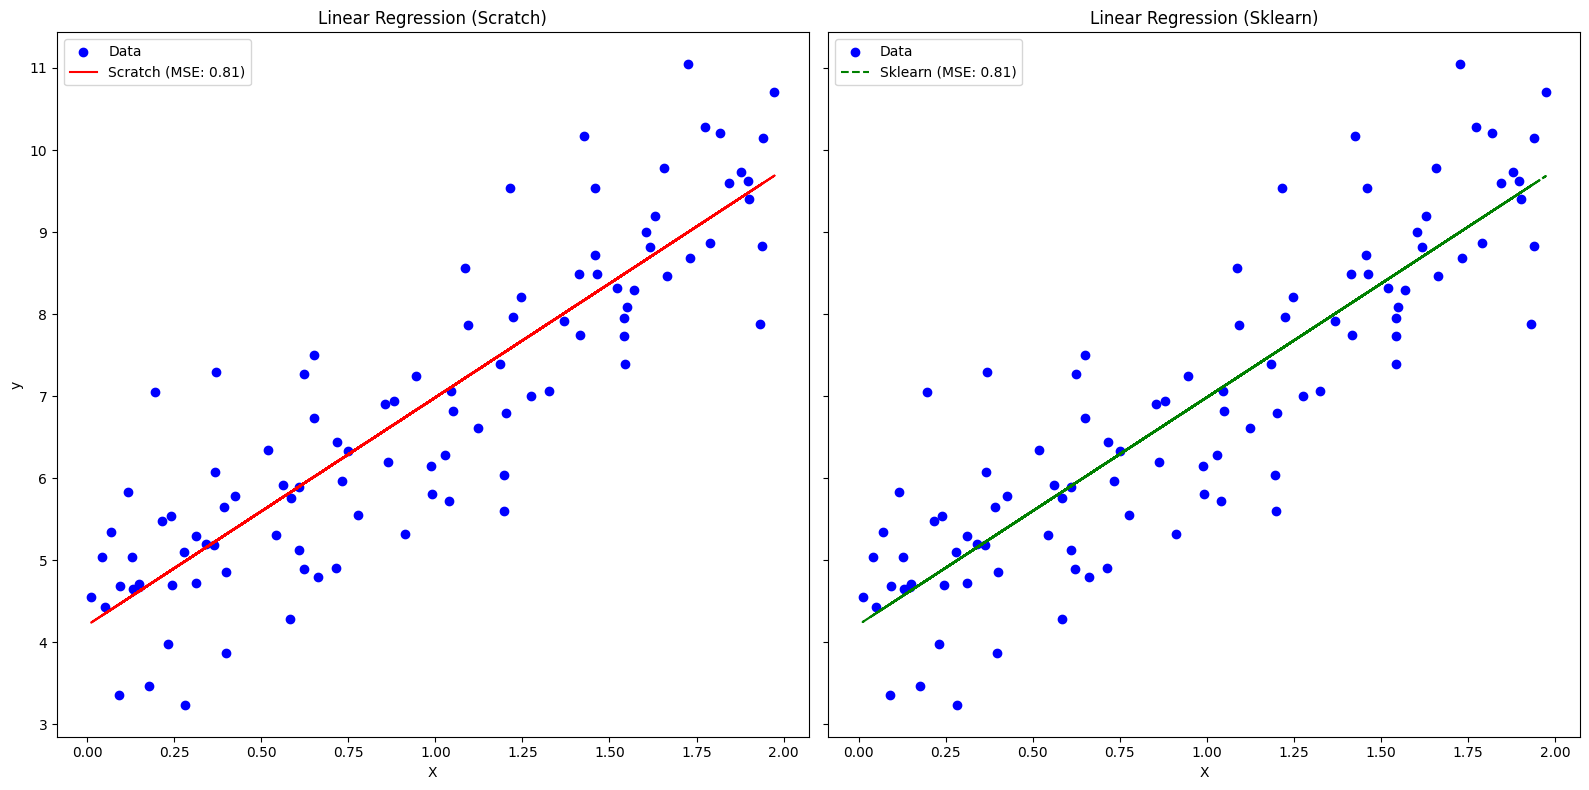

In [3]:
# Linear Regression Example
np.random.seed(42)
X_lr = 2 * np.random.rand(100, 1)
y_lr = 4 + 3 * X_lr + np.random.randn(100, 1)

# From Scratch Implementation
model_scratch = LinearRegressionScratch()
model_scratch.fit(X_lr, y_lr)
y_pred_scratch = model_scratch.predict(X_lr)
mse_scratch = np.mean((y_lr - y_pred_scratch) ** 2)

# Sklearn Implementation
model_sklearn = LinearRegression()
model_sklearn.fit(X_lr, y_lr)
y_pred_sklearn = model_sklearn.predict(X_lr)
mse_sklearn = np.mean((y_lr - y_pred_sklearn) ** 2)


fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
# Plot for Scratch Implementation
axes[0].scatter(X_lr, y_lr, color="blue", label="Data")
axes[0].plot(
    X_lr, y_pred_scratch, color="red", label=f"Scratch (MSE: {mse_scratch:.2f})"
)
axes[0].set_title("Linear Regression (Scratch)")
axes[0].legend()
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")

# Plot for Sklearn Implementation
axes[1].scatter(X_lr, y_lr, color="blue", label="Data")
axes[1].plot(
    X_lr,
    y_pred_sklearn,
    color="green",
    linestyle="--",
    label=f"Sklearn (MSE: {mse_sklearn:.2f})",
)
axes[1].set_title("Linear Regression (Sklearn)")
axes[1].legend()
axes[1].set_xlabel("X")

# Show the plots
plt.tight_layout()
plt.show()

## K-Means Clustering

### K-Means Clustering là gì?
K-Means Clustering là một thuật toán phân cụm (**clustering**) không giám sát được sử dụng để chia một tập dữ liệu thành $k$ nhóm (hoặc cụm, **clusters**) dựa trên tính tương đồng giữa các điểm dữ liệu.

Mục tiêu của K-Means Clustering là:
- Chia các điểm dữ liệu thành $k$ cụm sao cho mỗi cụm có các điểm tương tự nhau nhất.
- Tối ưu hóa vị trí của các tâm cụm (**centroids**) để giảm tổng bình phương khoảng cách giữa mỗi điểm dữ liệu và tâm cụm của nó.

---

### K-Means Clustering làm gì?
K-Means Clustering:
- **Phân cụm dữ liệu**: Chia tập dữ liệu thành các nhóm có tính tương đồng.
- **Tìm mẫu ẩn trong dữ liệu**: Dùng để phát hiện cấu trúc dữ liệu khi không có nhãn rõ ràng.
- **Nén dữ liệu**: Giảm số lượng điểm dữ liệu bằng cách biểu diễn mỗi cụm bằng tâm cụm của nó.

---

### K-Means Clustering giải quyết loại vấn đề nào?
K-Means Clustering giải quyết các bài toán **phân cụm không giám sát**, nơi mà dữ liệu không có nhãn cụ thể. Một số ví dụ:
- Phân cụm khách hàng dựa trên hành vi mua hàng.
- Phân đoạn ảnh theo màu sắc.
- Xác định các nhóm tương tự trong dữ liệu y sinh.

---

### K-Means Clustering hoạt động như thế nào?

Thuật toán K-Means hoạt động dựa trên các bước sau:

#### Bước 1: Khởi tạo tâm cụm
Chọn ngẫu nhiên $k$ điểm làm tâm cụm ban đầu (**centroids**).

#### Bước 2: Phân cụm
Gán mỗi điểm dữ liệu vào cụm có tâm gần nhất dựa trên khoảng cách Euclid:

$$
d(x_i, c_k) = \| x_i - c_k \|
$$

Ở đây:
- $x_i$: Một điểm dữ liệu.
- $c_k$: Tâm cụm thứ $k$.
- $d(x_i, c_k)$: Khoảng cách Euclid giữa $x_i$ và $c_k$.

#### Bước 3: Cập nhật tâm cụm
Tính toán lại tâm cụm $c_k$ mới bằng cách lấy trung bình tất cả các điểm dữ liệu trong cụm:

$$
c_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i
$$

Ở đây:
- $N_k$: Số điểm dữ liệu trong cụm $k$.
- $C_k$: Tập hợp các điểm trong cụm $k$.

#### Bước 4: Lặp lại
Lặp lại Bước 2 và Bước 3 cho đến khi:
- Tâm cụm không thay đổi (hội tụ).
- Hoặc đạt đến số vòng lặp tối đa.

---

### Hàm mất mát (Objective Function)
Mục tiêu của K-Means là tối ưu hóa tổng bình phương khoảng cách giữa mỗi điểm dữ liệu và tâm cụm của nó:

$$
J = \sum_{k=1}^K \sum_{x_i \in C_k} \| x_i - c_k \|^2
$$

Ở đây:
- $K$: Số cụm.
- $C_k$: Tập hợp các điểm trong cụm $k$.
- $c_k$: Tâm cụm thứ $k$.

---

### Đặc điểm và Giới hạn

#### Đặc điểm:
- **Nhanh và hiệu quả**: Thuật toán đơn giản và có thể áp dụng trên các tập dữ liệu lớn.
- **Dễ triển khai**: Cần ít tham số (chỉ $k$ - số cụm).
- **Tìm cụm hình cầu**: Hoạt động tốt với các cụm có hình dạng giống hình cầu.

#### Giới hạn:
- **Phụ thuộc vào $k$**: Số cụm $k$ phải được xác định trước, thường không rõ ràng.
- **Dễ bị ảnh hưởng bởi outliers**: Các giá trị bất thường có thể làm lệch tâm cụm.
- **Cụm phi tuyến tính**: Không hiệu quả với các cụm có hình dạng phức tạp hoặc chồng chéo.

---

### Tổng kết

K-Means Clustering là một thuật toán phân cụm không giám sát phổ biến, mạnh mẽ và dễ triển khai. Nó hoạt động dựa trên việc giảm tổng bình phương khoảng cách từ các điểm dữ liệu đến tâm cụm của chúng. Tuy nhiên, kết quả phụ thuộc vào việc chọn số cụm $k$ và độ nhạy cảm với các giá trị bất thường.

In [4]:
# K-Means Clustering from Scratch
class KMeansScratch:
    """
    Mô hình K-Means clustering được triển khai từ đầu.

    Thuộc tính:
        n_clusters (int): Số cụm cần tạo.
        max_iter (int): Số vòng lặp tối đa.
        centroids (numpy.ndarray): Tâm của các cụm.
        labels (numpy.ndarray): Phân cụm (cluster assignments) cho từng điểm dữ liệu.

    Phương thức:
        fit(X):
            Huấn luyện mô hình với dữ liệu đầu vào X bằng cách tìm tâm cụm và phân cụm.
        predict(X):
            Dự đoán phân cụm cho các điểm dữ liệu mới.
    """

    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    def fit(self, X, epsilon=1e-4):
        """
        Huấn luyện mô hình K-Means clustering với dữ liệu đầu vào.

        Args:
            X (numpy.ndarray): Dữ liệu đầu vào với kích thước (n_samples, n_features).
            epsilon (float): Ngưỡng thay đổi inertia để dừng sớm (early stopping)
        Returns:
            None
        """
        # Khởi tạo ngẫu nhiên các tâm cụm
        # Chọn ngẫu nhiên self.n_clusters số điểm từ dữ liệu X làm tâm cụm ban đầu.
        # Điều này đảm bảo rằng các tâm cụm được khởi tạo với sự đa dạng trong không gian dữ liệu.
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[idx, :]  # Tâm cụm ban đầu được lấy từ X tại các chỉ số idx.

        previous_inertia = float("inf")  # Khởi tạo giá trị inertia ban đầu cực lớn

        # Vòng lặp tối đa self.max_iter để thực hiện thuật toán K-Means
        for iteration in range(self.max_iter):
            # Tính khoảng cách và gán nhãn cụm
            distances = 
            self.labels = 

            # Cập nhật tâm cụm
            new_centroids = 

            # Tính inertia (tổng bình phương khoảng cách từ điểm đến tâm cụm gần nhất)
            current_inertia = 

            # Kiểm tra điều kiện hội tụ sớm (early stopping)
            if abs(previous_inertia - current_inertia) < epsilon:
                print(f"Dừng sớm tại vòng lặp {iteration + 1}, inertia: {current_inertia:.4f}")
                break

            # Cập nhật tâm cụm và inertia cho vòng lặp tiếp theo
            self.centroids = 
            previous_inertia = 

    def predict(self, X):
        """
        Dự đoán phân cụm cho các điểm dữ liệu mới.

        Args:
            X (numpy.ndarray): Dữ liệu đầu vào với kích thước (n_samples, n_features).

        Returns:
            numpy.ndarray: Phân cụm (cluster assignments) với kích thước (n_samples,).
        """
        # Tính khoảng cách giữa mỗi điểm dữ liệu và các tâm cụm
        # distances[i, k]: Khoảng cách Euclid giữa điểm dữ liệu X[i] và tâm cụm self.centroids[k].
        # Công thức khoảng cách Euclid:
        #    ||X[i] - self.centroids[k]|| = sqrt((x1 - c1)^2 + (x2 - c2)^2 + ... + (xn - cn)^2)
        # Trong numpy, tính toán này được thực hiện bằng np.linalg.norm với axis=2 để tính theo từng tâm cụm.
        distances = 

        # Trả về nhãn của cụm gần nhất
        # np.argmin(distances, axis=1): Với mỗi điểm dữ liệu X[i], tìm chỉ số cụm k có khoảng cách nhỏ nhất.
        # Kết quả là một vector labels (kích thước m x 1), trong đó labels[i] là chỉ số cụm của điểm X[i].
        return 

Dừng sớm tại vòng lặp 20, inertia: 22.3611


h:\Materials\AI Courses\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


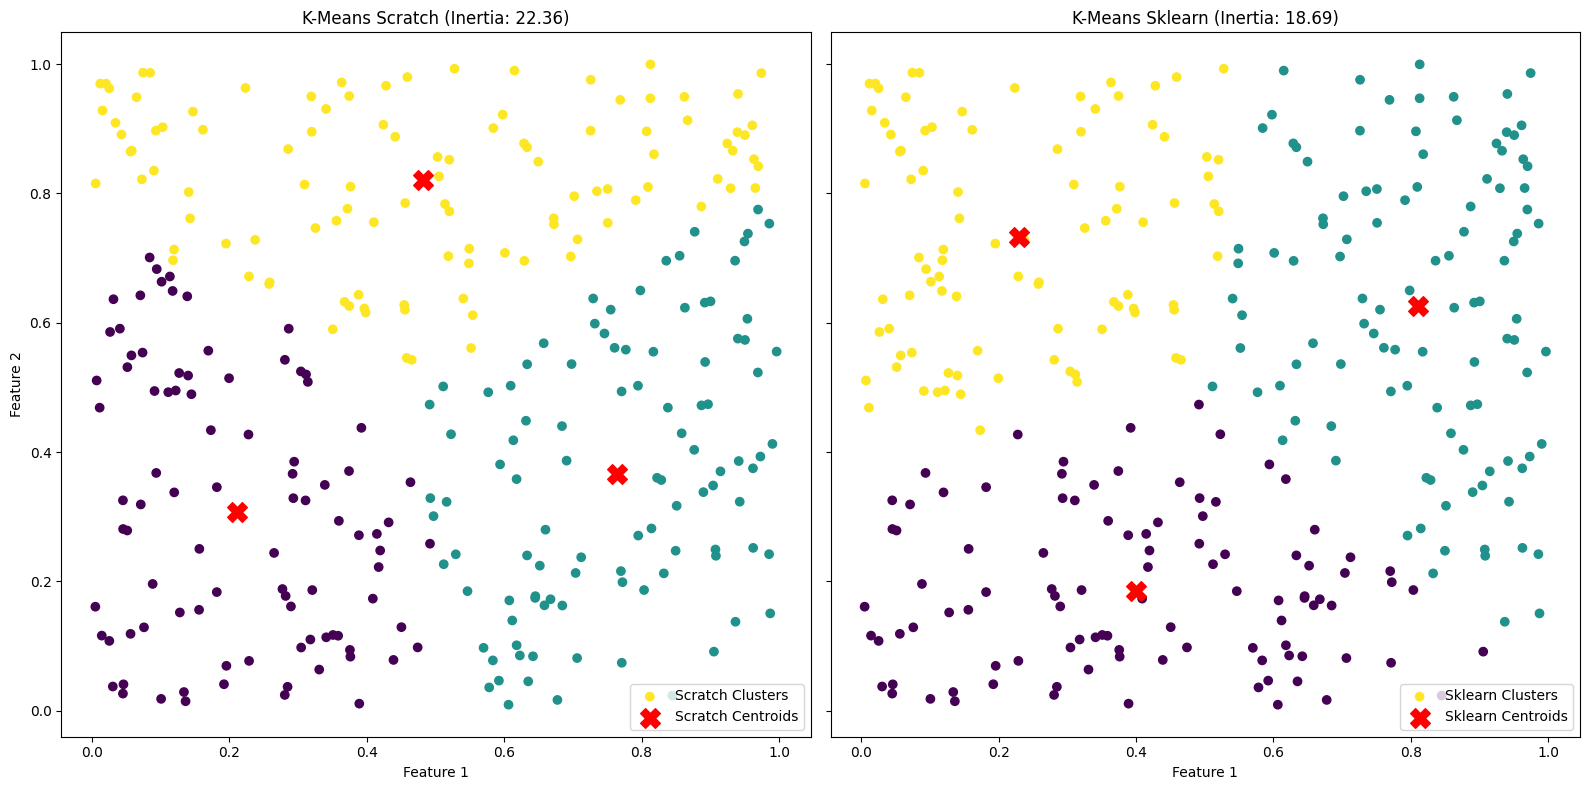

In [5]:
# K-Means Clustering Example
np.random.seed(42)
X_km = np.random.rand(300, 2)

# From Scratch Implementation
kmeans_scratch = KMeansScratch(n_clusters=3)
kmeans_scratch.fit(X_km)
labels_scratch = kmeans_scratch.predict(X_km)
inertia_scratch = np.sum((X_km - kmeans_scratch.centroids[labels_scratch]) ** 2)

# Sklearn/Scikit-Learn Implementation
kmeans_numpy = KMeans(n_clusters=3, random_state=42)
labels_numpy = kmeans_numpy.fit_predict(X_km)
inertia_numpy = kmeans_numpy.inertia_

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

# Plot for Scratch Implementation
axes[0].scatter(
    X_km[:, 0], X_km[:, 1], c=labels_scratch, cmap="viridis", label="Scratch Clusters"
)
axes[0].scatter(
    kmeans_scratch.centroids[:, 0],
    kmeans_scratch.centroids[:, 1],
    color="red",
    marker="X",
    s=200,
    label="Scratch Centroids",
)
axes[0].set_title(f"K-Means Scratch (Inertia: {inertia_scratch:.2f})")
axes[0].legend()
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Plot for Sklearn Implementation
axes[1].scatter(
    X_km[:, 0], X_km[:, 1], c=labels_numpy, cmap="viridis", label="Sklearn Clusters"
)
axes[1].scatter(
    kmeans_numpy.cluster_centers_[:, 0],
    kmeans_numpy.cluster_centers_[:, 1],
    color="red",
    marker="X",
    s=200,
    label="Sklearn Centroids",
)
axes[1].set_title(f"K-Means Sklearn (Inertia: {inertia_numpy:.2f})")
axes[1].legend()
axes[1].set_xlabel("Feature 1")

# Show the plots
plt.tight_layout()
plt.show()

### Câu hỏi thêm:
Vì sao k-means clustering của sklearn lại làm tốt hơn k-means clustering chúng ta tự làm?